<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek36.do.txt  -->
<!-- dom:TITLE: Exercises week 36 -->

In [226]:
import os

import pandas as pd
import regex as re

import numpy as np

import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [227]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

# Exercises week 36
**September 4-8, 2023**

Date: **Deadline is Sunday September 10 at midnight**

## Overarching aims of the exercises this week

This set of exercises form an important part of the first project. The
analytical exercises deal with the material covered last week on the
mathematical interpretations of ordinary least squares and of Ridge
regression. The numerical exercises can be seen as a continuation of
exercise 3 from week 35, with the inclusion of Ridge regression. This
material enters also the discussions of the first project.

## Exercise 1: Analytical exercises

The aim here is to derive the expression for the optimal parameters
using Ridge regression. Furthermore, using the singular value
decomposition, we will analyze the difference between the ordinary
least squares approach and Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the
optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

which we can also write as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. One can require as part of the optimization problem 
that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We will not implement that here.

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

### b) The singular value decomposition

Use the singular value decomposition of an n\times p$ matrix $\boldsymbol{X}$ (our design matrix)

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

where $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal matrices of dimensions
$n\times n$ and $p\times p$, respectively, and $\boldsymbol{\Sigma}$ is an
$n\times p$ matrix which contains the ingular values only. This material was discussed during the lectures of week 35.

Show that you can write the 
OLS solutions in terms of the eigenvectors (the columns) of the orthogonal matrix  $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  = \sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y}.
$$

For Ridge regression, show that the corresponding equation is

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$. 

Give an interpretation of the results.  [Section 3.4 of Hastie et al's textbook gives a good discussion of the above results](https://link.springer.com/book/10.1007/978-0-387-84858-7).

## Exercise 2: Adding Ridge Regression

This exercise is a continuation of exercise 3 from week 35, see <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html>. We will use the same function to generate our data set, still staying with a simple function $y(x)$ which we want to fit using linear regression, but now extending the analysis to include the Ridge regression method.

In this exercise you need to include the same elements from last week, that is 
1. scale your data by subtracting the mean value from each column in the design matrix.

2. perform a split of the data in a training set and a test set.

The addition to the analysis this time is the introduction of the hyperparameter $\lambda$ when introducing Ridge regression.

Extend the code from exercise 3 from [week 35](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html) to include Ridge regression with the hyperparameter $\lambda$. The optimal parameters $\hat{\beta}$ for Ridge regression can be obtained by matrix inversion in a similar way as done for ordinary least squares. You need to add to your code the following equations

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The ordinary least squares result you encoded last week is given by

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Use these results to compute the mean squared error for ordinary least squares and Ridge regression first for a polynomial of degree five with $n=100$ data points and five selected values of $\lambda=[0.0001,0.001, 0.01,0.1,1.0]$. Compute thereafter the mean squared error for the same values of $\lambda$ for polynomials of degree ten and $15$. Discuss your results for the training MSE and test MSE with Ridge regression and ordinary least squares.

In [228]:
# OLS 
def regression_and_cost_calc(X, y, methode=None, la=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # Deler opp modeldataen i trenings og test-data
    
    if methode is None or 0:
        beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
    elif methode == 1:
        # Ridge regression
        if la is None or not np.isreal(la):
            raise ValueError('To apply ridge regression provide a numerical values for lambda.')
        
        XtX = X_train.T @ X_train
        beta = np.linalg.inv(XtX + la*np.identity(np.shape(XtX)[0])) @ (X_train.T @ y_train)
    
    y_tilde = X_train @ beta
    y_predicted = X_test @ beta
    
    MSE_train = mean_squared_error(y_train, y_tilde)
    MSE_test = mean_squared_error(y_test, y_predicted)
    
    return MSE_train, MSE_test

In [229]:
def make_dummy_design_matrix(x, degree):
    # Initialize an empty list to store the polynomial features
    poly_features = []
    
    # Add the column of ones for the intercept term
    poly_features.append(np.ones_like(x))
    
    # Add polynomial features for each degree up to 'degree'
    for d in range(1, degree+1):
        poly_features.append(x**d)
    
    # Stack the polynomial features horizontally to create the design matrix
    X = np.hstack(poly_features)
    
    return X

Generate dummy data as in week 35

In [230]:
def generate_dummy_data(n):
    
    # Make data set.
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

    return x, y

Investigating the role of $\lambda$ we see that $\lambda = 0$ gives us the normal regression. Therefor we can just feed $\lambda = [0, 0.0001,0.001, 0.01,0.1,1.0]$ and do all the regression.

In [235]:
def generate_df(x, y):
    lambda_values = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]
    poly_orders = [5, 10, 15]
    
    df = pd.DataFrame({'lambda': lambda_values})
    
    for order in poly_orders:
        MSE = {'Trained': [],
               'Test': []}
    
        # The design matrix
        X = make_dummy_design_matrix(x, order)
        
        for la in lambda_values:
            MSE_trained, MSE_test = regression_and_cost_calc(X, y, 1, la)
                
            MSE['Trained'].append(MSE_trained)
            MSE['Test'].append(MSE_test)
        
        df[f'Trained {order}'] = MSE['Trained']
        df[f'Test {order}'] = MSE['Test']
    
    return df, poly_orders

In [232]:
def plot(df, poly_orders, run_number):
    # Create a colormap with as many colors as there are rows in the DataFrame
    colors = ['gray', '#00FFFF', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']
    
    fig, axes = plt.subplots(2, 3, figsize=(8,5.3), sharey=True, sharex=True)    
    for (index, la), ax in zip(df.iterrows(), axes.ravel()):
                
        la_val = la['lambda'] 
        la_str = fr'$\lambda$={la_val}' if la_val != 0.0000 else 'Normal reg.'
      
        ax.plot(poly_orders, la.filter(like='Trained'),
                 color=colors[index])
        ax.plot(poly_orders, la.filter(like='Test'),
                 linestyle='dashed', color=colors[index])
        ax.set_title(la_str, 
                     fontsize=10)
        
        # Add xlabel and ylabel to each main axis (subplot)
        if index >= 3:  # Only add labels to the bottom row of subplots
            ax.set_xlabel('Polynomial Order')
        if index % 3 == 0:  # Add ylabel only to the leftmost subplots in each row
            ax.set_ylabel('Mean Squared Error (MSE)')
            
    # Visuelle ting:
    
    plt.tight_layout() # Mindre mellomrom mellom plot
    
    plt.xticks(poly_orders) # Bare xticks på de aktuelle verdiene for polynomordene
    plt.xlim((4, 16)) # Litt mere mellomrom på hver side langs x aksen
    
    
    # Legends
    legend_labels = ['Trained', 'Test']
    legend_handles = [plt.Line2D([0], [0], color='black', lw=2, label=legend_labels[0]),  # Solid line in black for 'Trained'
                      plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label=legend_labels[1])]  # Dashed line in black for 'Test'
    plt.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(-.6, -0.3), ncol=2)
    
    plt.show()
    save_fig(f'Ridge regression, run {run_number}')

In [233]:
def run(iterations):
    for _ in range(iterations):
        x, y = generate_dummy_data(100)
        df, poly_orders = generate_df(x, y)
        plot(df, poly_orders, +1)

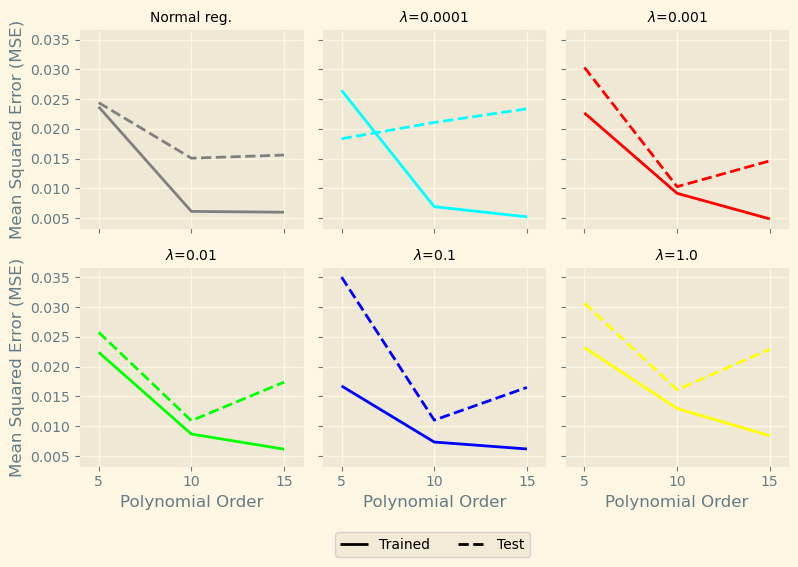

<Figure size 640x480 with 0 Axes>

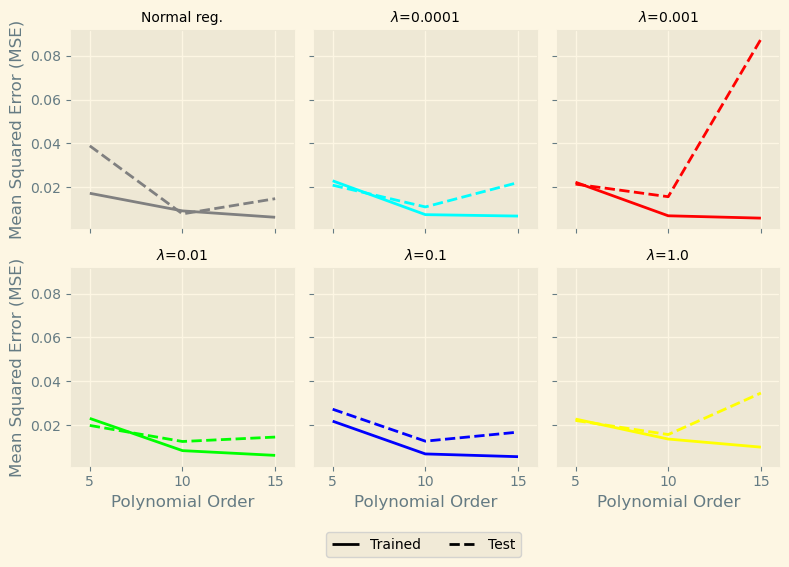

<Figure size 640x480 with 0 Axes>

In [244]:
run(2)

It seems that an order of 15 leads to overfitting in most cases (Increased MSE with higher order for the test data). In a choice of $\lambda$ it is hard to see any definete patterns in the optimal choice as it vary from run to run. Further, as I re-run for new random sets it seems that the normal regression (i.e. $\lambda = 0$) is performing better having lower MSE for the test prediction then the ridge regression. This is in line with discussion from the teaching hours. 